In [60]:
#homework for 02_regression
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#dataset
laptops_data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

!wget $laptops_data 
#data cleaning

--2024-10-03 20:15:32--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.3’

laptops.csv.3       100%[===================>] 291.58K  --.-KB/s    in 0.02s   

2024-10-03 20:15:32 (14.6 MB/s) - ‘laptops.csv.3’ saved [298573/298573]



In [61]:
df = pd.read_csv(laptops_data)
len(df)

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [62]:
#select cols 
df.dtypes
df = df[['ram', 'storage', 'screen', 'final_price']]


<Axes: xlabel='final_price', ylabel='Count'>

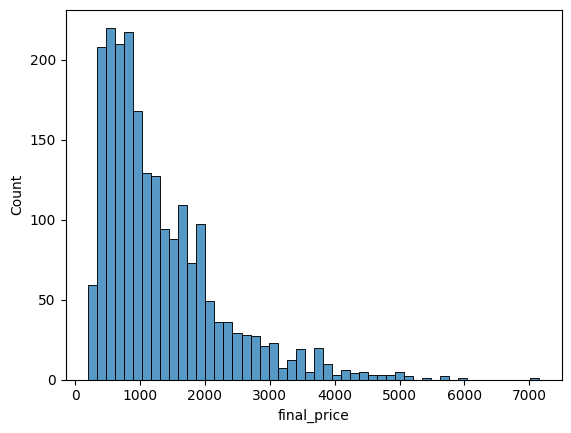

In [49]:
#inspect histo
sns.histplot(df.final_price, bins=50)
# has a long tail

In [63]:
#Q1 - column with missing value
df.isnull().sum()
#Answer : screen 

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [6]:
# Q2 - What's the median (50% percentile) for variable 'ram'?
df.ram.median()
# Answer 16

np.float64(16.0)

In [67]:
# prep datasets
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train


(432, 432, 1296)

In [68]:
#Shuffle the dataset (the filtered one you created above), use seed 42.
idx = np.arange(n)

#shuffle index
#set random seed to make reproducable
np.random.seed(42)
np.random.shuffle(idx)

In [69]:
df_shuffled = df.iloc[idx]

#with shuffle
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

#two ways of doing the same thing
# df_train = df.iloc[idx[:n_train]]
# df_val = df.iloc[idx[n_train:n_train+n_val]]
# df_test = df.iloc[idx[n_train+n_val:]]

In [70]:
#inspect: 
df_train.head()


,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [71]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [72]:
#reset indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [73]:
#set up y sets
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [74]:
len(y_train)

1296

In [75]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [16]:
# Question 3

#     We need to deal with missing values for the column from Q1.
#     We have two options: fill it with 0 or with the mean of this variable.
#     For computing the mean, use the training only!
df_train.ram.mean()
# 15.66666666666666



np.float64(15.666666666666666)

In [59]:
# build train_linear_regression() function first - section 2.7
df.values
df.columns

#X = df.values minus 
#y = final_price as an array


#X = np.array(df.values)

Index(['ram', 'storage', 'screen', 'final_price'], dtype='object')

In [ ]:
# Try both options. 
# For each, train a linear regression model **** without**** regularization using the code from the lessons.
# y is the column with the target values that we want to predict (final_price)
# we also want to drop this column from our non-y set so that we don't crash them. 

#LR with 0 for NaNs

#LR with ram.mean for NaNs 15.6666666

#     Use the validation dataset to evaluate the models and compare the RMSE of each option.
#     Round the RMSE scores to 2 decimal digits using round(score, 2)
#     Which option gives better RMSE?

In [31]:
# BUILDING MODELS - 0 - use section 2.8 for this step
#LR with 0 for NaNs
df_train.values


array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [76]:
# BUILDING MODELS - 
#LR Model building
#A

# X  array 
X = df_train.values
X = np.array(X)
X

ones = np.ones(X.shape[0])
ones

X = np.column_stack([ones, X])
X


array([[   1. ,   32. , 1000. ,   15.6],
       [   1. ,    4. ,   64. ,   14.1],
       [   1. ,   32. , 1000. ,   14. ],
       ...,
       [   1. ,   16. ,  512. ,   15.6],
       [   1. ,   16. ,  512. ,   14. ],
       [   1. ,   16. ,  512. ,   14. ]])

In [77]:
#build y
y = df.final_price.values

y = np.array(y)
y

array([1009.  ,  299.  ,  789.  , ..., 3399.99, 1899.99, 1699.99])

In [78]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

ValueError: shapes (4,1296) and (2160,) not aligned: 1296 (dim 1) != 2160 (dim 0)

In [79]:
#determine w0 and w
w0 = w_full[0]
w = w_full[1:]

w0, w

NameError: name 'w_full' is not defined

In [84]:
y = df.final_price.values

#___B____def LR model____________________
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

#_____________________________

base = ['ram', 'storage', 'screen']

X_train = df_train[base].fillna(15.66666666666666666).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)


#__C   RMSE___________
#RMSE function - 
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

round(rmse(y_train, y_pred), 2)
#.45 for 0 for NaNs

np.float64(0.45)

<Axes: ylabel='Count'>

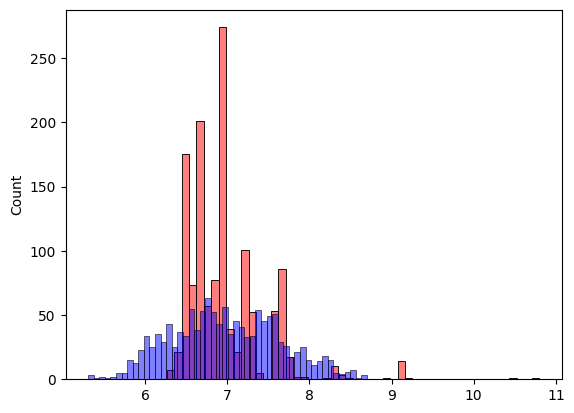

In [81]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [88]:
# BUILDING MODELS - 15.66666666666666 - use section 2.8 for this step
#LR with ram.mean() for NaNs 
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
#__________________

base = ['ram', 'storage', 'screen']

X_train = df_train[base].fillna(15.66666666666666).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

#_______________________
#RMSE function - 
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

outcome = round(rmse(y_train, y_pred), 2)
#.45 for 0 for NaNs
outcome

np.float64(0.45)

In [ ]:
# Question 4

#     Now let's train a regularized linear regression.
#     For this question, fill the NAs with 0.
#     Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
#     Use RMSE to evaluate the model on the validation dataset.
#     Round the RMSE scores to 2 decimal digits.
#     Which r gives the best RMSE?
